In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style= "whitegrid")

In [3]:
df = pd.read_csv("AIML Dataset.csv")

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.shape

(6362620, 11)

In [8]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [10]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.shape

(6362620, 11)

In [14]:
round((df["isFraud"].value_counts()[1]/df.shape[0] )*100,2)

0.13

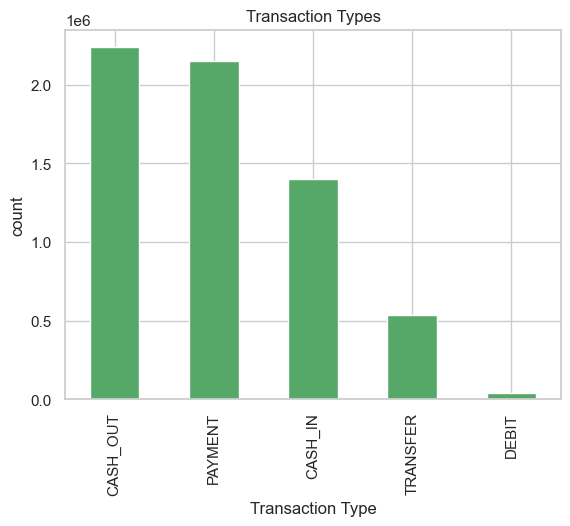

In [15]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types",color ="g")
plt.xlabel("Transaction Type")
plt.ylabel("count")
plt.show()

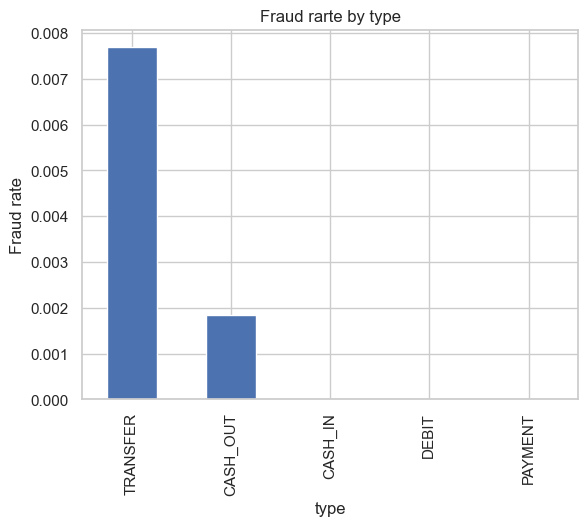

In [16]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind= "bar", title="Fraud rarte by type",color ="b")
plt.ylabel("Fraud rate")
plt.show()

In [17]:
df["amount"].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

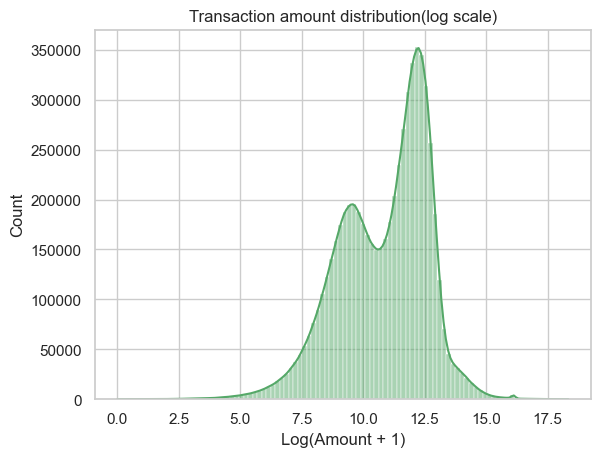

In [18]:
sns.histplot(np.log1p(df["amount"]),bins=100, kde=True,color="g")
plt.title("Transaction amount distribution(log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

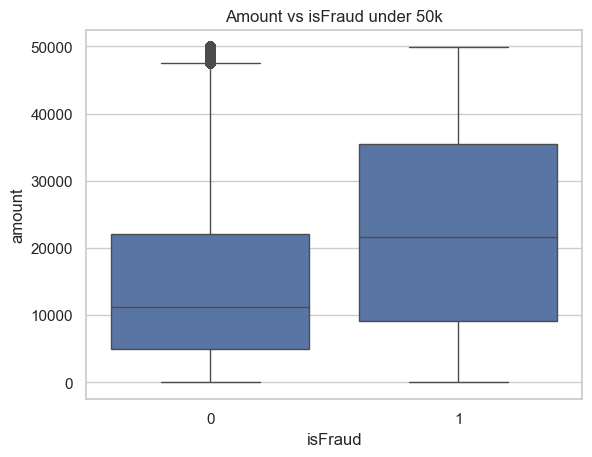

In [19]:
sns.boxplot(data = df[df["amount"]< 50000],x="isFraud", y= "amount")
plt.title("Amount vs isFraud under 50k")
plt.show()

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
df["newbalancDiffeOrig"]= df["oldbalanceOrg"] -df["newbalanceOrig"]
df["newbalancDiffeDest"]= df["oldbalanceDest"] -df["newbalanceDest"]

In [22]:
(df["newbalancDiffeOrig"] < 0).sum()

1399253

In [23]:
(df["newbalancDiffeDest"] < 0).sum()

2806464

In [24]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newbalancDiffeOrig,newbalancDiffeDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


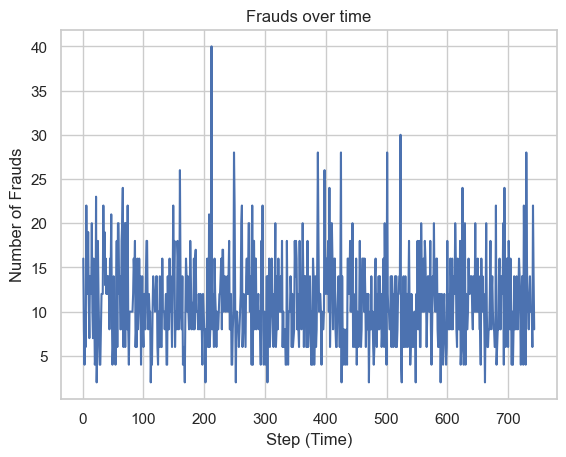

In [25]:
fraud_per_step= df[df["isFraud"]== 1 ]["step"].value_counts().sort_index()
plt.plot(fraud_per_step.index, fraud_per_step , label = "Frauds per step" )
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds over time")
plt.grid(True)
plt.show()


In [26]:
df.drop(columns="step", inplace=True)

In [27]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newbalancDiffeOrig,newbalancDiffeDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [28]:
top_senders = df["nameOrig"].value_counts().head(10)

In [29]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [30]:
top_receivers = df["nameDest"].value_counts().head(10)

In [31]:
top_receivers


nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [32]:
fraud_user =  df[df["isFraud"] ==1 ]["nameOrig"].value_counts().head(10)

In [33]:
fraud_user

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [34]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [35]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

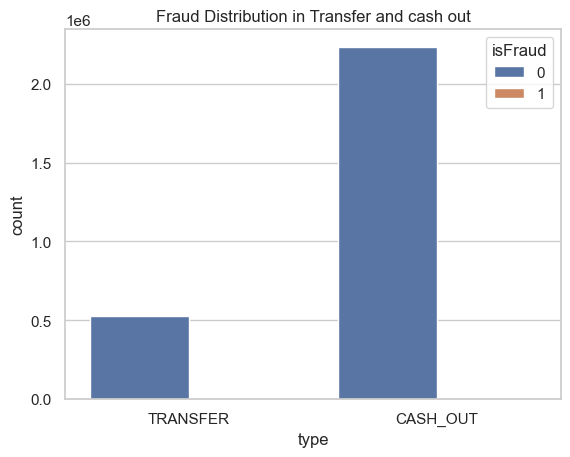

In [36]:
sns.countplot(data = fraud_types , x = "type", hue = "isFraud")
plt.title("Fraud Distribution in Transfer and cash out")
plt.show()

In [37]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'newbalancDiffeOrig', 'newbalancDiffeDest'],
      dtype='object')

In [38]:
corr = df[["amount","oldbalanceOrg","oldbalanceOrg","oldbalanceDest", "oldbalanceDest","isFraud"]].corr()

In [39]:
corr

,amount,oldbalanceOrg,oldbalanceOrg,oldbalanceDest,oldbalanceDest,isFraud
amount,1.000000,-0.002762,-0.002762,0.294137,0.294137,0.076688
oldbalanceOrg,-0.002762,1.000000,1.000000,0.066243,0.066243,0.010154
oldbalanceOrg,-0.002762,1.000000,1.000000,0.066243,0.066243,0.010154
oldbalanceDest,0.294137,0.066243,0.066243,1.000000,1.000000,-0.005885
oldbalanceDest,0.294137,0.066243,0.066243,1.000000,1.000000,-0.005885
isFraud,0.076688,0.010154,0.010154,-0.005885,-0.005885,1.000000


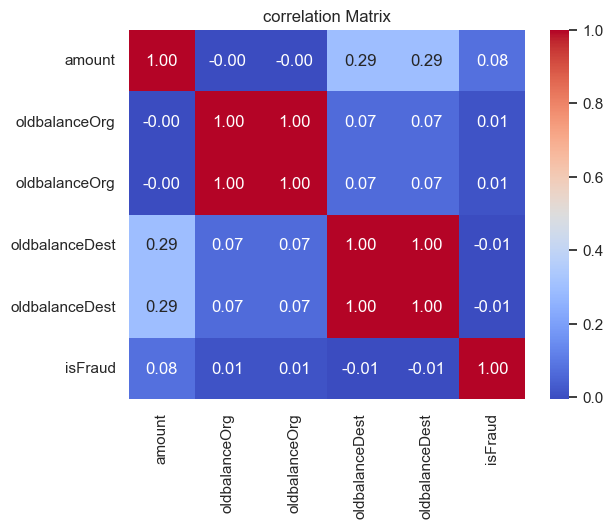

In [40]:
sns.heatmap(corr,annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation Matrix")
plt.show()

In [41]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]


In [42]:
len(zero_after_transfer)

1188074

In [43]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newbalancDiffeOrig,newbalancDiffeDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


In [44]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [46]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newbalancDiffeOrig,newbalancDiffeDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [47]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [48]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,newbalancDiffeOrig,newbalancDiffeDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [49]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [50]:
y= df_model["isFraud"]
X=df_model.drop("isFraud", axis=1)

In [51]:
X_train , X_test, y_train , y_test = train_test_split(X,y ,test_size=0.3, stratify=y)

In [52]:
preprocessor = ColumnTransformer(
    transformers= [ 
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop = "first"), categorical) 
        ],
    remainder= "drop"   
)

In [53]:
pipeline =  Pipeline(
    [
        ("prep", preprocessor),
        ("clt",LogisticRegression(class_weight="balanced", max_iter=1000))
    ]
)

In [54]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clt',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [55]:
pipeline.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [56]:
y_pred = pipeline.predict(X_test)

In [57]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.97   1906322\n           1       0.02      0.93      0.04      2464\n\n    accuracy                           0.95   1908786\n   macro avg       0.51      0.94      0.51   1908786\nweighted avg       1.00      0.95      0.97   1908786\n'

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.93      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [59]:
confusion_matrix(y_test, y_pred)

array([[1808836,   97486],
       [    176,    2288]])

In [60]:
pipeline.score(X_test, y_test)

0.9488355425909453

In [61]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']